# Breast Cancer Gene Expression Analysis - Part 0: Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [2]:
# Plotting config
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.dpi'] = 100

In [3]:
gex = pd.read_csv('/Users/dana/Desktop/AHI/01_PAML/Project/data/mammacarcinoma_gex.csv', index_col=0)
patinfo = pd.read_csv('/Users/dana/Desktop/AHI/01_PAML/Project/data/mammacarcinoma_pat.csv', index_col=0)

In [4]:
gex

,DDR1,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,EPHB3,ESRRA,CYP2A6,...,CASP8AP2,POLM,KLK5,SH3BP4,SPO11,TRDN,DKFZP564C196,YDD19,TAZ,GMEB2
patient_id,,,,,,,,,,,,,,,,,,,,,
0,9.2048,6.3038,7.7602,7.9725,4.26530,2.9992,3.6423,6.9242,6.9467,6.3267,...,5.8878,2.5847,6.1013,8.4443,3.151000,1.83220,3.38240,3.7738,5.6098,7.2277
1,10.0090,5.8149,6.7343,7.9232,3.50110,5.2618,4.3622,6.9789,6.5636,10.4700,...,6.7993,5.5474,6.3789,8.3950,3.133900,1.90000,3.25240,3.2802,6.2927,7.2210
2,8.6175,5.9355,5.8762,6.5176,2.53460,6.0643,4.6878,7.2233,6.2347,4.9583,...,6.5924,4.5240,7.2288,8.0967,3.149900,-1.16120,2.68950,3.6827,5.5525,6.6015
3,9.6734,7.0122,5.5486,8.0859,4.28850,4.9998,2.9966,6.1568,6.6900,5.9646,...,6.5698,4.6732,5.3107,9.1025,3.112300,-0.63409,2.66560,3.4840,6.4214,7.7900
4,9.0900,6.0937,6.6429,7.9868,3.27290,5.4990,2.0513,6.7127,6.7884,5.8864,...,5.7934,5.0880,5.2918,7.3995,4.138500,-0.47459,-0.89478,2.7115,6.4785,7.1017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,9.6058,5.6191,6.8271,7.8933,5.17700,4.8729,4.7611,6.7124,6.3606,6.1115,...,6.4481,4.9890,5.0753,8.7309,4.053800,2.65610,3.46090,2.0747,6.3080,7.1414
323,9.5777,6.1209,6.1702,6.9966,4.01260,5.5290,3.0468,7.0455,6.7004,11.0220,...,5.6446,3.9242,6.2588,8.3053,2.981300,3.80950,3.76110,4.4177,5.6289,6.6664
324,8.7979,5.2583,5.8413,7.7988,4.92420,4.5145,4.4398,6.7248,5.8855,5.8516,...,6.2356,3.9251,5.0435,8.9658,5.158400,1.15010,0.82005,2.5920,6.3487,7.3176


In [5]:
patinfo

,node,grade,size,age,er,relapse
patient_id,,,,,,
0,0.0,NaN,0.0,44.0,1.0,0.0
1,0.0,NaN,0.3,61.0,1.0,0.0
2,0.0,NaN,1.5,53.0,1.0,0.0
3,0.0,3.0,3.0,62.0,1.0,1.0
4,NaN,3.0,NaN,NaN,1.0,0.0
...,...,...,...,...,...,...
322,0.0,2.0,2.5,69.0,1.0,NaN
323,NaN,1.0,NaN,NaN,1.0,NaN
324,0.0,2.0,2.1,40.0,1.0,0.0


In [6]:
print(f"Gene expression: {gex.shape[0]} patients × {gex.shape[1]} genes")
print(f"Patient info: {patinfo.shape[0]} patients × {patinfo.shape[1]} variables")

Gene expression: 327 patients × 6384 genes
Patient info: 327 patients × 6 variables


In [7]:
# Missing values
print(f"\nGene expression missing: {gex.isnull().sum().sum()} values")
print(f"Patient info missing per variable:")
for col in patinfo.columns:
    n_miss = patinfo[col].isnull().sum()
    print(f"  {col}: {n_miss} ({n_miss/len(patinfo)*100:.1f}%)")


Gene expression missing: 0 values
Patient info missing per variable:
  node: 80 (24.5%)
  grade: 52 (15.9%)
  size: 76 (23.2%)
  age: 75 (22.9%)
  er: 19 (5.8%)
  relapse: 109 (33.3%)


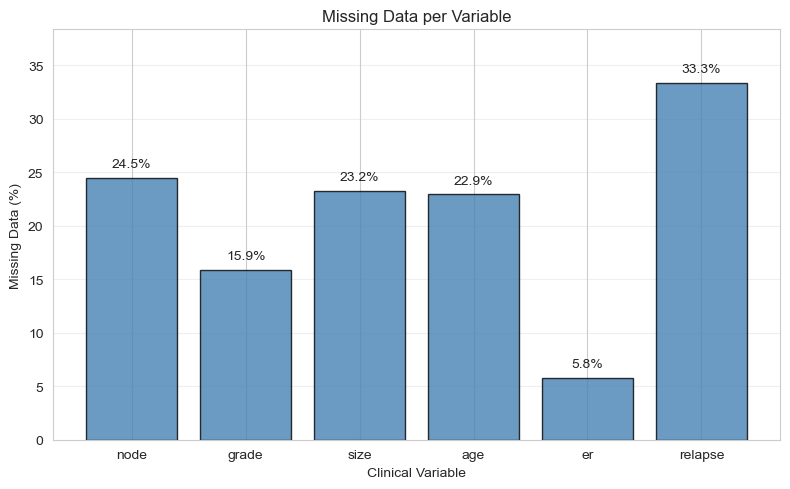

Total missing: 411 values (20.9% of all data)


In [8]:
# Calculate missing data
missing_counts = patinfo.isnull().sum()
missing_pct = (missing_counts / len(patinfo)) * 100

# Create plot
plt.figure(figsize=(8, 5))
bars = plt.bar(missing_counts.index, missing_pct, color='steelblue', 
               edgecolor='black', alpha=0.8)

# Add percentage labels on top of bars
for i, (var, pct) in enumerate(zip(missing_counts.index, missing_pct)):
    plt.text(i, pct + 1, f'{pct:.1f}%', ha='center', fontsize=10)

plt.ylabel('Missing Data (%)')
plt.xlabel('Clinical Variable')
plt.title('Missing Data per Variable')
plt.ylim(0, max(missing_pct) * 1.15)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('missing_data.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Total missing: {missing_counts.sum()} values "
      f"({missing_counts.sum()/(len(patinfo)*len(patinfo.columns))*100:.1f}% of all data)")

In [15]:
# Class distributions
print(f"Class distributions:")
for col in ['node', 'grade', 'er', 'relapse']:
    counts = patinfo[col].value_counts().sort_index()
    print(f"{col}: {(counts)}")

print(f"Continuous variables:")
print(f"age: {patinfo['age'].mean():.1f} ± {patinfo['age'].std():.1f} years")
print(f"size: {patinfo['size'].mean():.2f} ± {patinfo['size'].std():.2f} cm")

Class distributions:
node: node
0.0    192
1.0     55
Name: count, dtype: int64
grade: grade
1.0     68
2.0    143
3.0     64
Name: count, dtype: int64
er: er
0.0     46
1.0    262
Name: count, dtype: int64
relapse: relapse
0.0    128
1.0     90
Name: count, dtype: int64
Continuous variables:
age: 58.7 ± 11.9 years
size: 2.22 ± 1.13 cm


In [17]:
for col in ["node", "grade", "er", "relapse"]:
    counts = patinfo[col].value_counts(dropna=False).sort_index()
    percentages = counts / counts.sum() * 100

    summary = pd.DataFrame({
        "count": counts,
        "percentage (%)": percentages.round(2)
    })

    print(f"{col}:")
    print(summary)

node:
      count  percentage (%)
node                       
0.0     192           58.72
1.0      55           16.82
NaN      80           24.46
grade:
       count  percentage (%)
grade                       
1.0       68           20.80
2.0      143           43.73
3.0       64           19.57
NaN       52           15.90
er:
     count  percentage (%)
er                        
0.0     46           14.07
1.0    262           80.12
NaN     19            5.81
relapse:
         count  percentage (%)
relapse                       
0.0        128           39.14
1.0         90           27.52
NaN        109           33.33


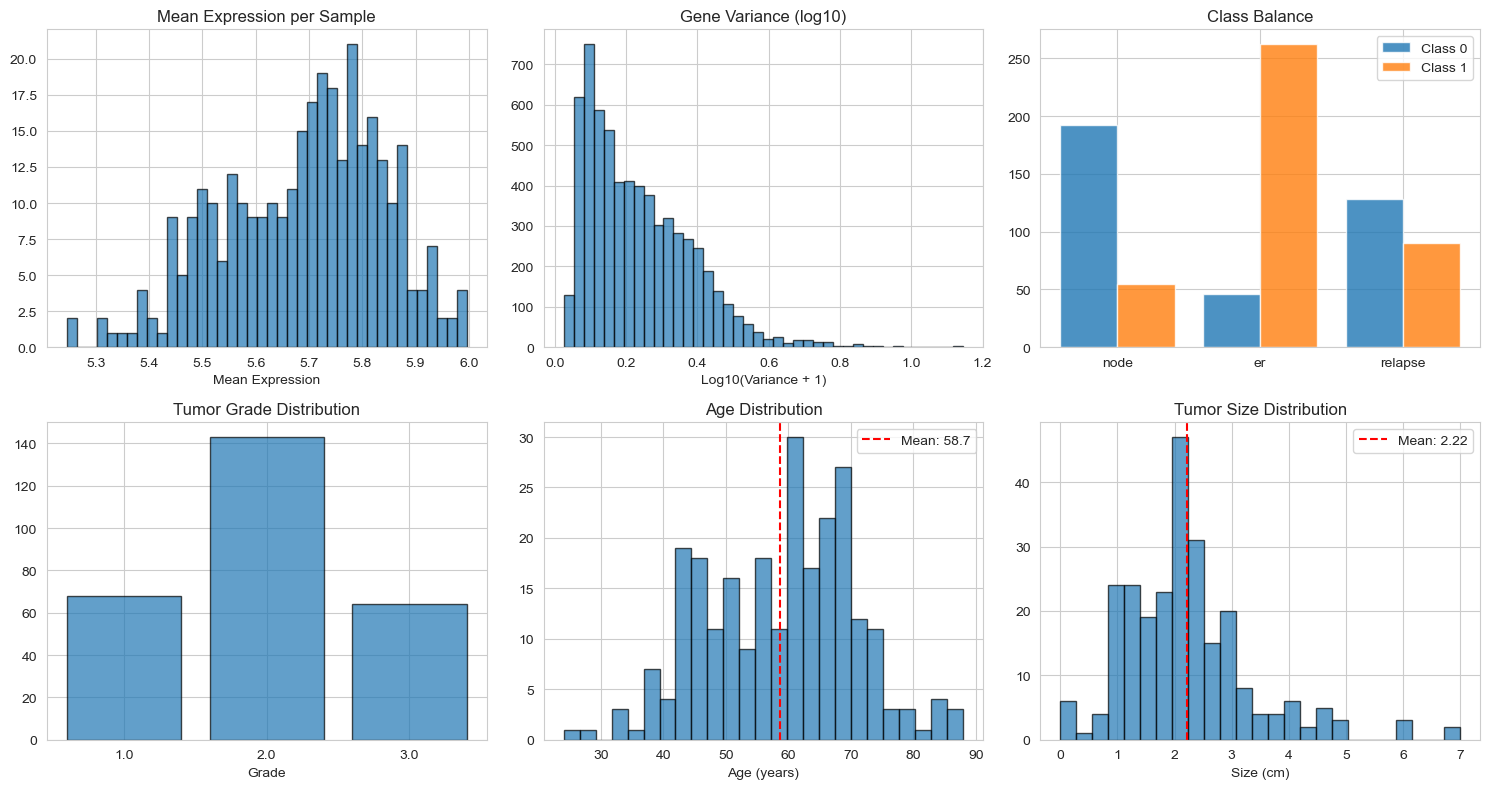

In [10]:
# Visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Gene expression distributions
axes[0,0].hist(gex.mean(axis=1), bins=40, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Mean Expression per Sample')
axes[0,0].set_xlabel('Mean Expression')

gene_vars = gex.var(axis=0) # . var() function computes the variance of the elements in an array, either across all elements or along a specified axis (if provided)
axes[0,1].hist(np.log10(gene_vars + 1), bins=40, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Gene Variance (log10)')
axes[0,1].set_xlabel('Log10(Variance + 1)')

# Class balance
binary_vars = ['node', 'er', 'relapse']
x = np.arange(len(binary_vars))
class0 = [patinfo[v].value_counts().get(0, 0) for v in binary_vars]
class1 = [patinfo[v].value_counts().get(1, 0) for v in binary_vars]
axes[0,2].bar(x - 0.2, class0, 0.4, label='Class 0', alpha=0.8)
axes[0,2].bar(x + 0.2, class1, 0.4, label='Class 1', alpha=0.8)
axes[0,2].set_xticks(x)
axes[0,2].set_xticklabels(binary_vars)
axes[0,2].set_title('Class Balance')
axes[0,2].legend()

# Grade distribution
grade_counts = patinfo['grade'].value_counts().sort_index()
axes[1,0].bar(grade_counts.index.astype(str), grade_counts.values, 
              edgecolor='black', alpha=0.7)
axes[1,0].set_title('Tumor Grade Distribution')
axes[1,0].set_xlabel('Grade')

# Age distribution
axes[1,1].hist(patinfo['age'].dropna(), bins=25, edgecolor='black', alpha=0.7)
axes[1,1].axvline(patinfo['age'].mean(), color='red', linestyle='--', 
                  label=f"Mean: {patinfo['age'].mean():.1f}")
axes[1,1].set_title('Age Distribution')
axes[1,1].set_xlabel('Age (years)')
axes[1,1].legend()

# Tumor size distribution
axes[1,2].hist(patinfo['size'].dropna(), bins=25, edgecolor='black', alpha=0.7)
axes[1,2].axvline(patinfo['size'].mean(), color='red', linestyle='--',
                  label=f"Mean: {patinfo['size'].mean():.2f}")
axes[1,2].set_title('Tumor Size Distribution')
axes[1,2].set_xlabel('Size (cm)')
axes[1,2].legend()

plt.tight_layout()
plt.savefig('part0_exploration.png', dpi=300, bbox_inches='tight')
plt.show()